In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/ce802-p3-data/CE802_P3_Data.csv')
df.columns
features = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16']

cat_features = ['F8', 'F15']


In [3]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["F8"] = ord_enc.fit_transform(df[["F8"]])
df["F15"] = ord_enc.fit_transform(df[["F15"]])
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,0.0,3,1577.82,-383.82,12,-2289.14,-19.69,0.0,25354.83,167.75
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,1.0,4,1884.69,-488.34,6,-2899.20,-19.46,4.0,32380.17,704.46
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,1.0,4,2063.79,-287.76,6,-2885.52,-20.57,3.0,28882.38,302.43
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,2.0,7,1319.19,-435.54,4,-2319.80,-20.24,3.0,28523.04,2420.98
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,0.0,1,1921.14,-246.45,10,-1344.40,-21.90,2.0,27915.81,271.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24.31,1.13,8.46,5.33,-9.72,-825.75,114.32,1.0,3,695.19,-153.15,6,-2057.96,-13.74,0.0,69349.74,2473.75
1496,1.06,1.05,13.70,2.39,1.42,-1108.38,137.60,1.0,2,1360.74,-449.82,4,-2974.08,-29.45,4.0,22585.59,120.67
1497,39.25,-1.64,2.12,7.45,-12.26,-900.42,121.52,0.0,3,716.16,-408.42,4,-3032.14,-26.16,2.0,37818.39,204.91
1498,0.31,-0.76,3.66,4.54,-11.16,-804.75,188.26,0.0,6,1449.69,-316.80,14,-2574.60,-16.49,0.0,27166.41,306.95



 Scatterplots (Target vs Feature):



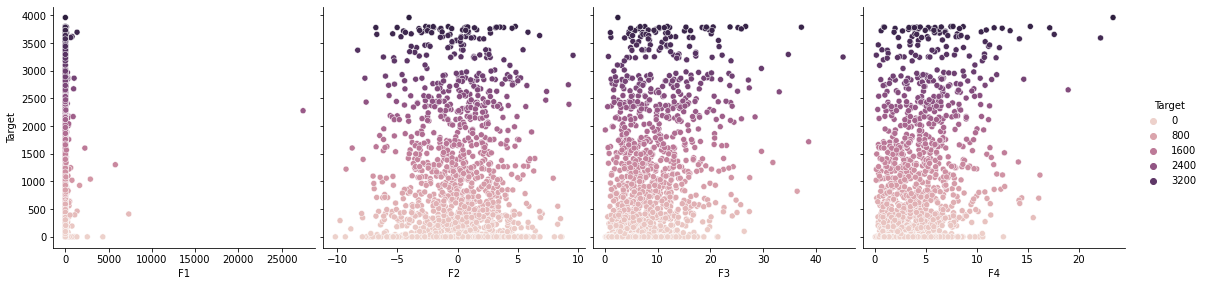

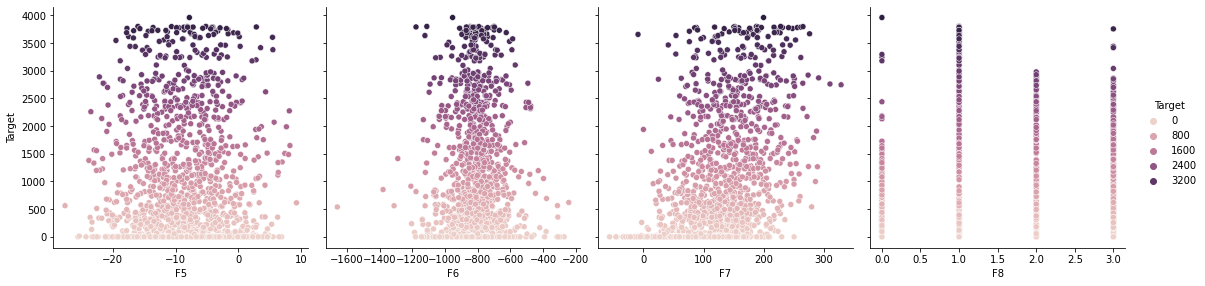

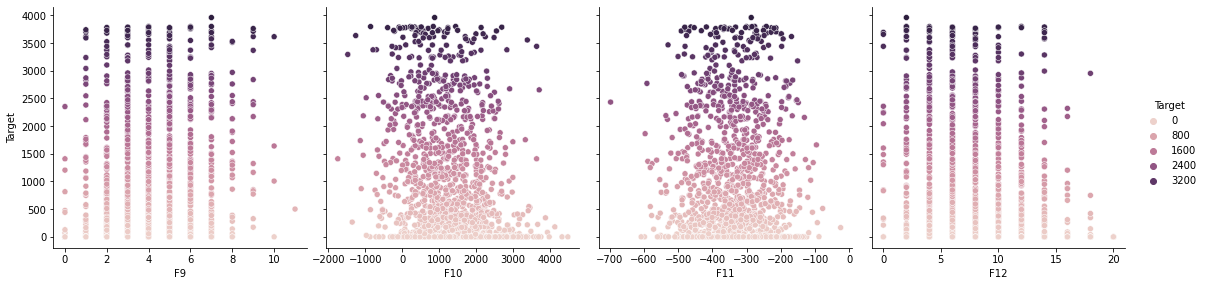

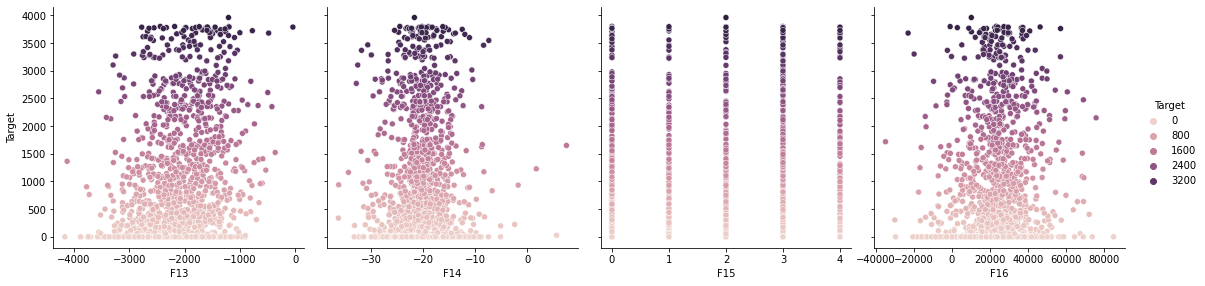

In [4]:
import seaborn as sns 
print ('\n Scatterplots (Target vs Feature):\n')
scatterplot_1_4 = sns.pairplot(data=df,
                             y_vars=['Target'],
                             x_vars=['F1','F2','F3','F4'], 
                             hue = 'Target', height=4) # Output: Scatterplot Target vs F1, Target vs F2, Target vs F3 and Target vs F4

scatterplot_5_8 = sns.pairplot(data=df,
                             y_vars=['Target'],
                             x_vars=['F5','F6','F7','F8'], 
                             hue = 'Target', height=4) # Output: Scatterplot Target vs F5, Target vs F6, Target vs F7 and Target vs F8

scatterplot_9_12 = sns.pairplot(data=df,
                             y_vars=['Target'],
                             x_vars=['F9','F10','F11','F12'], 
                             hue = 'Target', height=4) # Output: Scatterplot Target vs F9, Target vs F10, Target vs F11 and Target vs F12

scatterplot_13_16 = sns.pairplot(data=df,
                             y_vars=['Target'],
                             x_vars=['F13','F14','F15','F16'], 
                             hue = 'Target', height=4) 

In [5]:
X_df = df[features].copy()
y_df = df['Target'].copy()


X = X_df.values
y = y_df.values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [7]:
def model_evaluation(Y_test, Y_pred): 
    print('\nMean Absolute Error: %s'%(metrics.mean_absolute_error(Y_test, Y_pred))+'''
Mean Squared Error: %s'''%(metrics.mean_squared_error(Y_test, Y_pred))+'''
Root Mean Squared Error: %s'''%(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))+'''
R\u00b2 Score: %s'''%(metrics.r2_score(Y_test, Y_pred)))

0.6686548014148062
[0.63031394 0.61370122 0.67058962 0.65826269 0.66036396]

Mean Absolute Error: 497.95789540980115
Mean Squared Error: 386621.6008444406
Root Mean Squared Error: 621.78903242534
R² Score: 0.6686548014148062


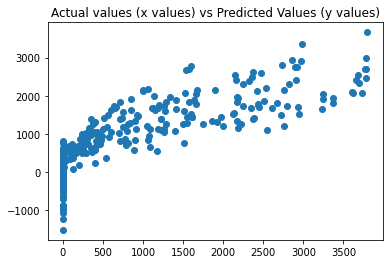

In [8]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, LinearRegression
clf_l = LinearRegression().fit(X_train, y_train)
y_pred = clf_l.predict(X_test)
print(clf_l.score(X_test, y_test))

score = cross_val_score(clf_l, X_train, y_train, cv=5) 
print(score)

model_evaluation(y_test, y_pred) 
plt.title('Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,y_pred)

0.3890594545450049
[0.10704834 0.35506483 0.28645234 0.25023409 0.18626795]

Mean Absolute Error: 547.9676166666667
Mean Squared Error: 712860.2216454166
Root Mean Squared Error: 844.3105007314647
R² Score: 0.3890594545450049


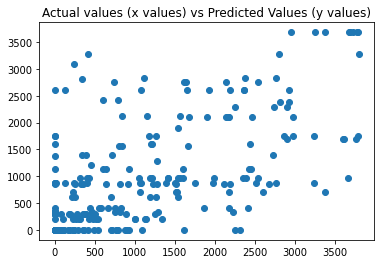

In [9]:
from sklearn.tree import DecisionTreeRegressor
clf_d = DecisionTreeRegressor(criterion='mae',max_depth=6,random_state=50)
clf_d.fit(X_train, y_train)
y_pred_d = clf_d.predict(X_test)
print(clf_d.score(X_test, y_test))


score = cross_val_score(clf_d, X_train, y_train, cv=5) 
print(score)

model_evaluation(y_test, y_pred_d) 
plt.title('Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,y_pred_d)

0.7605987371605887
[0.68080833 0.76344198 0.79685416 0.74693457 0.73451171]

Mean Absolute Error: 384.3463969510497
Mean Squared Error: 279339.1903017297
Root Mean Squared Error: 528.5254868989099
R² Score: 0.7605987371605887


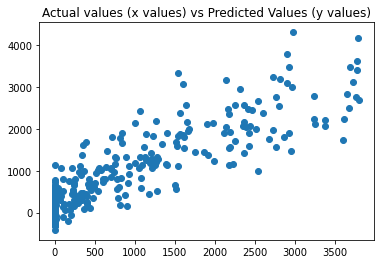

In [10]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf_svc = make_pipeline(StandardScaler(),SVR(C=5000))
clf_svc.fit(X_train, y_train)
y_pre_svc = clf_svc.predict(X_test)
# print(y_pre_svc)
print(clf_svc.score(X_test, y_test))


score = cross_val_score(clf_svc, X_train, y_train, cv=5) 
print(score)


model_evaluation(y_test, y_pre_svc) 
plt.title('Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,y_pre_svc)


# param_grid_s ={
#     'C': [500, 1000, 5000]
# }
# clf_s_grid = GridSearchCV(clf_svc, param_grid_s, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
# clf_s_grid.fit(X_train, y_train)
# print(clf_s_grid.best_score_)
# print(clf_s_grid.best_params_)

0.7051242835693728
[0.58676335 0.66290254 0.68678497 0.64960667 0.59987176]
0.6442835993979087
{'n_estimators': 200}

Mean Absolute Error: 443.64768000000004
Mean Squared Error: 344068.12600076915
Root Mean Squared Error: 586.5732060031119
R² Score: 0.7051242835693728


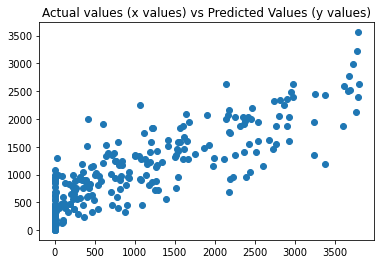

In [11]:
from sklearn.ensemble import RandomForestRegressor # Import random forest regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pre_random_forest = random_forest.predict(X_test)
print(random_forest.score(X_test, y_test))


score = cross_val_score(random_forest, X_train, y_train, cv=5) 
print(score)


param_grid_r ={
    'n_estimators': [50,100,150,200]
}
clf_r_grid = GridSearchCV(random_forest, param_grid_r, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
clf_r_grid.fit(X_train, y_train)
print(clf_r_grid.best_score_)
print(clf_r_grid.best_params_)


model_evaluation(y_test, y_pre_random_forest) 
plt.title('Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,y_pre_random_forest)

0.6302636740645039
[0.56206586 0.60360726 0.58218666 0.5325733  0.60703068]
0.5991550131423012
{'n_neighbors': 8}

Mean Absolute Error: 461.8170666666667
Mean Squared Error: 431417.29783288
Root Mean Squared Error: 656.8236428698955
R² Score: 0.6302636740645039


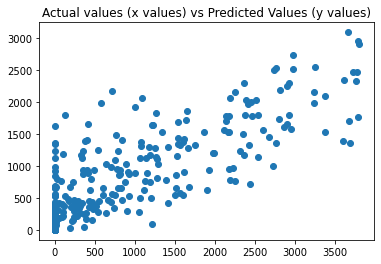

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)


x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train, y_train)
y_pre_knn = clf_knn.predict(X_test)
print(clf_knn.score(X_test, y_test))


score = cross_val_score(clf_knn, X_train, y_train, cv=5) 
print(score)


param_grid_k ={
    'n_neighbors': range(1,15)
}
clf_k_grid = GridSearchCV(clf_knn, param_grid_k, cv=10, n_jobs=-1) # create grid search including pipe and parameters 
clf_k_grid.fit(X_train, y_train)
print(clf_k_grid.best_score_)
print(clf_k_grid.best_params_)


model_evaluation(y_test, y_pre_knn) 
plt.title('Actual values (x values) vs Predicted Values (y values)')
plt.scatter(y_test,y_pre_knn)

In [13]:
df_test = pd.read_csv('../input/ce802-p3-data/CE802_P3_Test.csv')
ord_enc = OrdinalEncoder()
df_test["F8"] = ord_enc.fit_transform(df_test[["F8"]])
df_test["F15"] = ord_enc.fit_transform(df_test[["F15"]])


X_t = df_test[features].copy()

X_t = X_t.values

In [14]:
clf_svr_n = make_pipeline(StandardScaler(),SVR(C=5000))
clf_svr_n.fit(X, y)
y_pre_svr_n = clf_svr_n.predict(X_t)

new_array = pd.DataFrame({'Target': y_pre_svr_n})
df_test['Target'] = new_array
print(df_test)                     


         F1    F2     F3    F4     F5      F6      F7   F8  F9      F10  \
0      0.04 -0.21   3.68  1.54  -6.70 -929.34  234.18  3.0   2  3391.35   
1      0.89  2.97   2.28  1.97  -4.52 -700.62  106.84  1.0   2  3479.19   
2      0.37 -0.17   7.14  0.40 -14.26 -796.14   32.30  3.0   5   918.93   
3      5.37  0.07   7.18  6.81  -6.14 -801.03   32.92  0.0   2  2657.43   
4      0.26  6.16   3.54  1.10 -16.76 -652.08  227.98  1.0   4  2739.96   
...     ...   ...    ...   ...    ...     ...     ...  ...  ..      ...   
1495   0.27 -1.82   3.06  1.81  -0.56 -843.15  230.60  2.0   0   669.90   
1496   4.69  0.87   4.88  5.08  -6.64 -827.76   90.38  2.0   6  3327.69   
1497  15.05  3.14   2.64  3.74  -3.92 -716.73   55.62  3.0   4   238.56   
1498   0.04 -1.55  11.22  6.41 -10.80 -869.10   82.80  3.0   6  4278.54   
1499   3.01  2.77  17.54  1.84 -12.32 -864.87  103.08  1.0   2  1338.39   

         F11  F12      F13    F14  F15       F16       Target  
0    -415.41    6 -1460.14 -20.55  

In [15]:

rows = df_test
  
# using the savetxt  
# from the numpy module 

np.savetxt("test.csv",  
           rows, 
           delimiter =", ",
           header = "F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, Target",
           fmt ='% s',
           comments =" ")